# NMDA2020第三次作业
MNIST是视觉处理方面的结构比较简单的标准数据集。我们已经将数据集整理，包括手写16\*16像素的黑白手写数字图像和对应的数字标记，并分为train,validation和test三组。图像数据已经转换为256长度的灰度值向量，标签的值为0-9。training set用于训练网络，validation set用于在训练过程中观察训练是否出现了过拟合。test set用于训练结束后评价训练结果。

本次作业将训练包含一层隐层的神经网络在MNIST数据集上进行分类任务。你需要完成Assignment3.ipynb和Network.py。

Assignment3.ipynb将引导你完成任务，你需要按顺序运行里面的模块。
Network.py中定义了Network类。Network类中定义了多个反向传播算法相关的方法，目前只是定义了接口，在下面的任务中需要完成代码。

如果你对python中面向对象概念不熟悉，请先学习相关的概念。可以参考https://zhuanlan.zhihu.com/p/37145434

### 要求完成并提交的文件：

* Assignment3.ipynb 本次作业的主要文件 （本文件）

* Network.py 本次作业中用来实现Network类的文件

* back_prop.pdf 推导反向传播的计算过程

### 我们提供的其他文件：

* X_test.npy X_train.npy X_val.npy Y_test.npy Y_train.npy Y_val.npy 数据文件，已经过整理
* test_utils.py test_pred.npy 帮助检验计算正确性的模组

### 数据格式：

* X: 为np.array，形状为\[N,256\]，其中N为数据的数量。
* y: 为np.array，形状为\[N,\]，N为数据的数量。y的值为0-9，对应相应的标签。
* 下面第二个单元可以用来显示数据的形状


In [1]:
#Initialization

import numpy as np
import matplotlib.pyplot as plt


#test tools
import test_utils

#setting plot default parameters
plt.rcParams['figure.figsize'] = (10.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


Show an example:


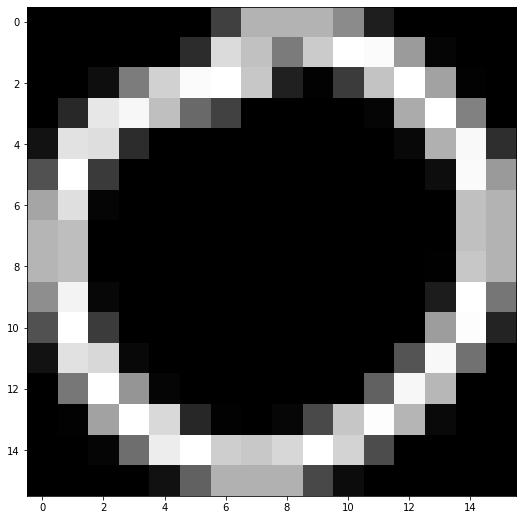

label: 0 

Train data shape:  (1000, 256)
Train labels shape:  (1000,)
Validation data shape:  (1000, 256)
Validation labels shape:  (1000,)
Test data shape:  (9000, 256)
Test labels shape:  (9000,)


In [2]:
# Load the data

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

print('Show an example:')
a0 = X_train[100,:].reshape(16,16)
plt.imshow(a0)
plt.show()
print('label:', y_train[100], '\n')

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

## 任务1 : 完成网络的前向传播

网络的结构为：输入层，隐层，输出层，softmax，交叉熵。其中，隐层为ReLu层。最终的Loss由交叉熵和L2正则项得到。

网络的初始化位于Network类中的\_\_init\_\_方法中。这个方法是python中的类初始化方法。前向传播位于forward_pass方法中，参数为数据X,y,和L2正则项的参数wd_decay。其中,y为缺省参数，当没有y输入时应该输出预测的标签。

由于之后计算反向传播时需要隐层和输出层的计算结果，请将这些计算结果以Network类的成员形式储存。

在未经训练的状态下，loss应接近2.30

### 随机数，伪随机和随机种子：

计算机中存在两种随机数：一类是比较常用的伪随机数，是由一定的算法产生的随机数序列截取而成。这种随机数在一定长度内可以保证相关性为0，通常可以直接作为随机数使用。另一种为真随机数，使用物理方法生成，通过测量物理上不可预测的小量生成。我们在这次作业中使用的都是伪随机数。

随机种子可以控制随机序列的起始状态。而后，根据不同的随机算法，可以迭代出无限长的随机序列。因此，当确定随机种子后，随机序列也完全确定。

任务1中，助教已经使用0作为随机种子，通过随机初始化得到了一个神经网络，并得到了在测试集上的预测。如果你的随机初始化方法和题目要求相同，使用了相同的随机种子，你也应当在测试集上得到相同的预测结果。我们会检查你的预测结果和我们得到的预测结果是否相同

### 要求：
* 参数初始化：W初始化为标准差std的正态分布，b初始化为0
* 前向传播：输入标签y时返回loss，不输入标签y时返回预测的标签predict，predict与y形状相同。

In [3]:
#Test run for task 1

from Network import Network

np.random.seed(0)
hidden_size = 256

net = Network(hidden_size)
predict = net.forward_pass(X_test)
if test_utils.check_pred(predict):
    print('Your prediction PASSed check!')
else: 
    print('Your prediction FAILed check!')
    
loss = net.forward_pass(X_test, y_test)
print('Loss = %f' % loss)

Your prediction PASSed check!
Loss = 2.302585


## 任务2+3：完成网络的反向传播
为检验反向传播算法的正确性，要求使用数值计算梯度进行对比。反向传播和数值计算梯度分别对应back_prop方法和numerical_gradient方法。需要返回grads，类似于params成员，其中包括W1,b1,W2,b2所对应的梯度。
### 要求：
* 推倒反向传播计算过程
* 完成Network类的back_prop方法，返回梯度grads
* 完成数值计算梯度，以小量delta为步长计算梯度并返回
* 检验两种梯度计算结果是否相同

In [4]:
#Test run for task2 

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
wd_decay = 0.05
delta = 1e-5

np.random.seed(0)

net = Network(input_size = input_size, hidden_size = hidden_size, output_size = num_classes, std=1e-1)
X, y = test_utils.init_toy_data(num_inputs, input_size, num_classes)

loss = net.forward_pass(X, y, wd_decay = wd_decay)
grads = net.back_prop(X, y, wd_decay = wd_decay)
num_grads = net.numerical_gradient(X, y, wd_decay = wd_decay, delta = delta)

# Errors should all be less than 1e-8 or so
for param_name in grads:
    print('%s max relative error: %e' % (param_name, test_utils.rel_error(num_grads[param_name], grads[param_name])))

W1 max relative error: 1.084016e-09
b1 max relative error: 8.546013e-10
W2 max relative error: 6.633922e-10
b2 max relative error: 2.702162e-10


## 任务4：随机梯度下降
得到了正确的梯度后，可以开始使用随机梯度下降方法进行网络训练，这部分对应train方法。请使用之前实现的前向传播算法和反向传播算法，实现支持momentum的随机梯度下降。在随机梯度下降迭代过程中，每次需要选取数据集的一部分作为minibatch作为数据，这里可能用到numpy.random.choice。为了查看训练过程，需要记录下训练中的loss和正确率的变化过程。代码中提供了4个容器用来记录loss_history,acc_history,val_loss_history,val_acc_history。可以使用append添加记录。

### 要求：
* 实现梯度下降，支持momentum和minibatch
* 记录训练过程中的loss变化和正确率变化

### 为了可以重现实验的结果，以下部分请使用学号作为随机初始化的种子

iteration 0 / 140: training loss 2.302585 val loss: 2.303598
iteration 10 / 140: training loss 2.296442 val loss: 2.309332
iteration 20 / 140: training loss 2.321883 val loss: 2.310391
iteration 30 / 140: training loss 2.314200 val loss: 2.307081
iteration 40 / 140: training loss 2.231550 val loss: 2.245460
iteration 50 / 140: training loss 2.180746 val loss: 2.098882
iteration 60 / 140: training loss 1.893214 val loss: 1.964149
iteration 70 / 140: training loss 2.010730 val loss: 1.912484
iteration 80 / 140: training loss 1.664941 val loss: 1.581606
iteration 90 / 140: training loss 1.562838 val loss: 1.256897
iteration 100 / 140: training loss 0.970368 val loss: 1.239474
iteration 110 / 140: training loss 0.818302 val loss: 1.333625
iteration 120 / 140: training loss 1.480687 val loss: 1.880942
iteration 130 / 140: training loss 0.643060 val loss: 1.033049


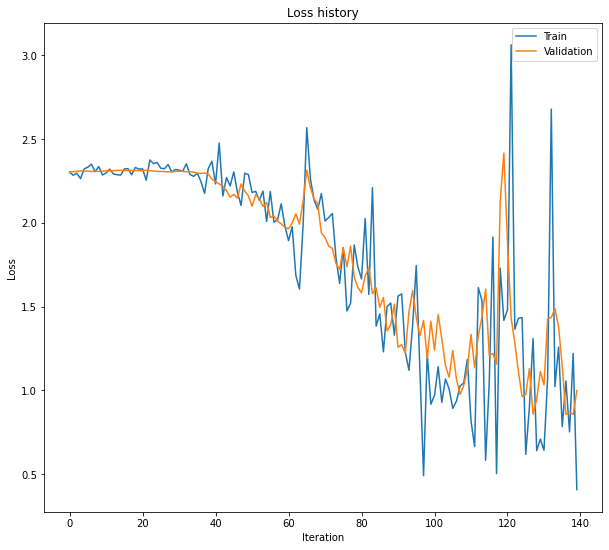

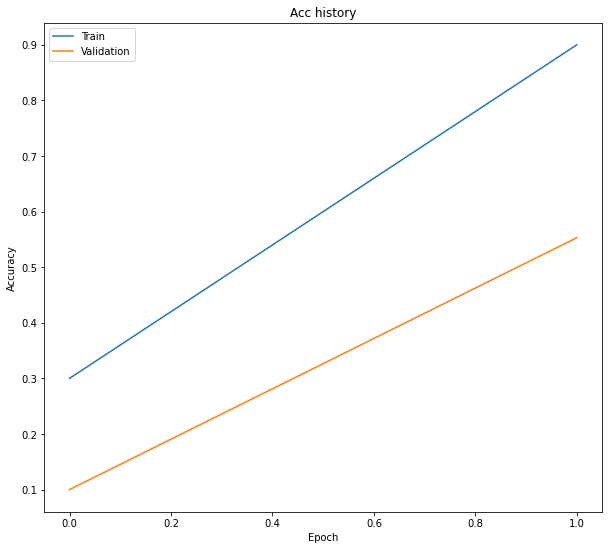

Final accuracy on test set: 0.6223333333333333


In [5]:
# Test run for task 3

np.random.seed(2018011153)

hidden_size = 10

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.5, momentum=0, wd_decay=0, 
            num_iters=140, batch_size=10,
            do_early_stopping=False,
            print_every=10, verbose=True)

test_utils.plot_loss_history(stats['loss_history'], stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

## 任务5：Overfitting
 
我们已经得到了一个可以工作的神经网络，并且实现了使用梯度下降进行训练。下面，我们使用一个256隐层的网络去训练。训练结果可以很明显的看到，出现了严重的过拟合现象。
Early stop策略是一种简单的防止过拟合的策略，通过loss的变化监测何时停止训练。
Learning rate decay 是另一个常见的训练策略。通过逐步减小的learning rate达到更好的训练效果。 

### 要求：
* 修改训练过程，实现early stop
* 修改训练过程，实现Learning rate decay

iteration 0 / 1000: training loss 2.302585 val loss: 2.302624
iteration 50 / 1000: training loss 0.129709 val loss: 0.437735
iteration 100 / 1000: training loss 0.075722 val loss: 0.377531
iteration 150 / 1000: training loss 0.004924 val loss: 0.372340
iteration 200 / 1000: training loss 0.000630 val loss: 0.387445
iteration 250 / 1000: training loss 0.000544 val loss: 0.384836
iteration 300 / 1000: training loss 0.000523 val loss: 0.387825
iteration 350 / 1000: training loss 0.000359 val loss: 0.390248
iteration 400 / 1000: training loss 0.000292 val loss: 0.392763
iteration 450 / 1000: training loss 0.000315 val loss: 0.397082
iteration 500 / 1000: training loss 0.000253 val loss: 0.400590
iteration 550 / 1000: training loss 0.000122 val loss: 0.400358
iteration 600 / 1000: training loss 0.000163 val loss: 0.402430
iteration 650 / 1000: training loss 0.000235 val loss: 0.405280
iteration 700 / 1000: training loss 0.000271 val loss: 0.407778
iteration 750 / 1000: training loss 0.00017

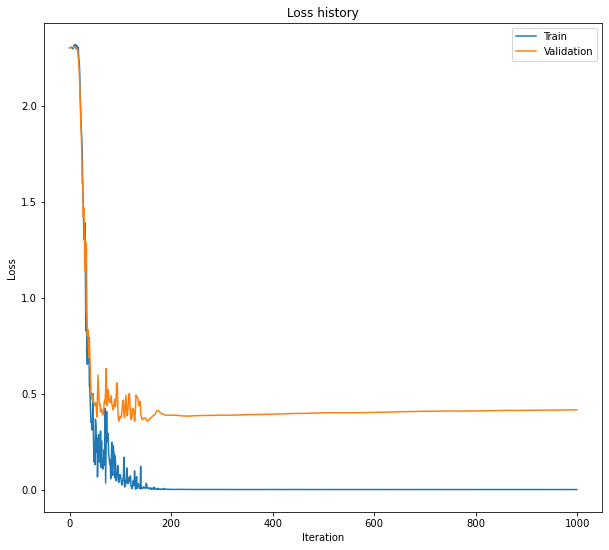

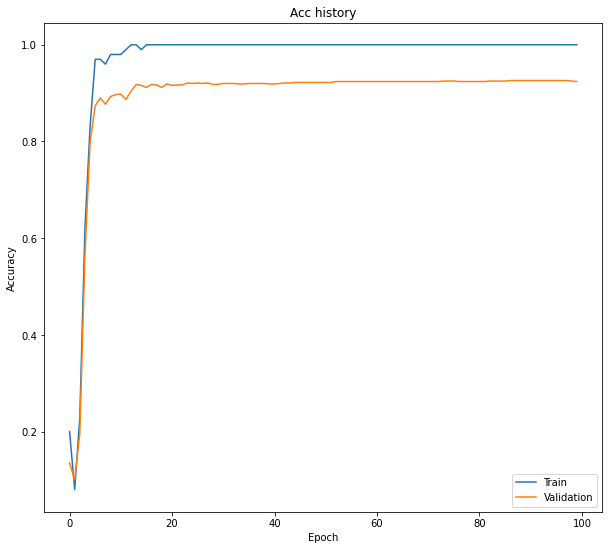

Final accuracy on test set: 0.9316666666666666


In [6]:
#Demo run for overfitting

np.random.seed(2018011153)

hidden_size = 256

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0, 
            num_iters=1000, batch_size=100,
            do_early_stopping=False,
            print_every=50, verbose=True)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

iteration 0 / 1000: training loss 2.302592 val loss: 2.302631
iteration 50 / 1000: training loss 0.958462 val loss: 1.159723
iteration 100 / 1000: training loss 0.921688 val loss: 0.927472
iteration 150 / 1000: training loss 0.870691 val loss: 0.918049
iteration 200 / 1000: training loss 0.688102 val loss: 0.916018
iteration 250 / 1000: training loss 0.809094 val loss: 0.930631
iteration 300 / 1000: training loss 0.838331 val loss: 0.987568
iteration 350 / 1000: training loss 0.700003 val loss: 0.819666
iteration 400 / 1000: training loss 0.690686 val loss: 0.862652
iteration 450 / 1000: training loss 0.688667 val loss: 0.821814
iteration 500 / 1000: training loss 0.685552 val loss: 0.797442
iteration 550 / 1000: training loss 0.661404 val loss: 0.795159
iteration 600 / 1000: training loss 0.676345 val loss: 0.798020
iteration 650 / 1000: training loss 0.686534 val loss: 0.767520
iteration 700 / 1000: training loss 0.700997 val loss: 0.757849
iteration 750 / 1000: training loss 0.66662

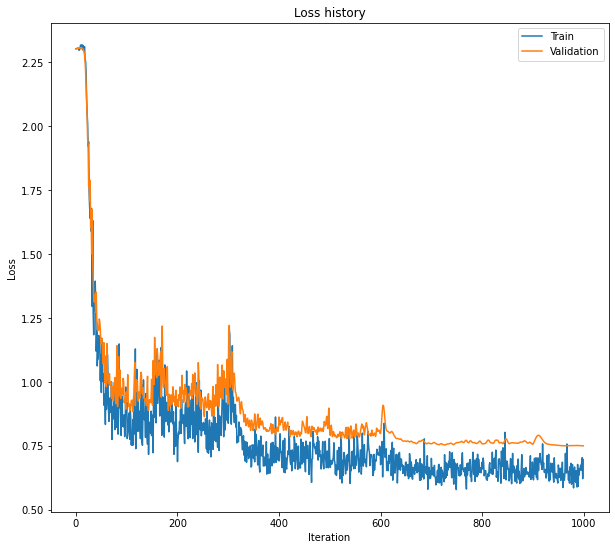

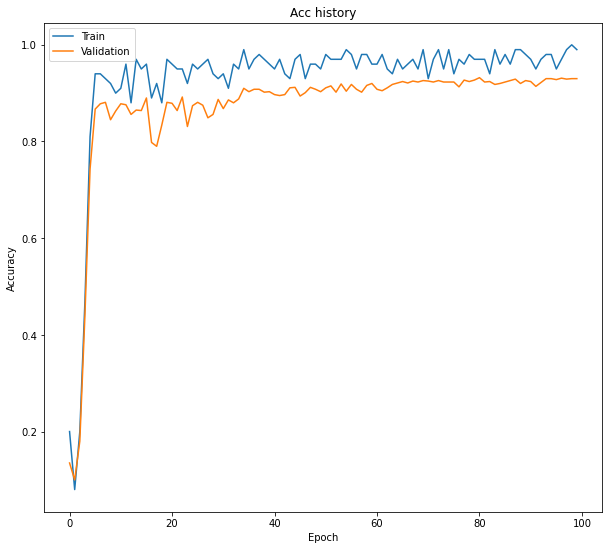

Final accuracy on test set: 0.9206666666666666


In [7]:
# Test run for task 4

np.random.seed(2018011153)

hidden_size = 256

net = Network(hidden_size = hidden_size)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0.02, 
            num_iters=1000, batch_size=100,
            do_early_stopping=True,alpha = 1,
            print_every=50, verbose=True)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

+ 由于使用随机梯度下降，验证集准确率存在波动，因而代码中设置判定“验证集准确率开始下降”的条件为“当前验证集准确率比最佳验证集准确率下降0.1以上”。可以看出此训练过程中并未触发early stop机制，仍达到了预设的训练次数。
+ 相比“Demo run for overfitting”中还增加了wd_decay。可以看出，验证准确率没有出现下降转折点，同时验证准确率与训练准确率接近，说明正则化的加入减轻了过拟合的问题。
+ 相比“Demo run for overfitting”中还增加了learning_rate_decay。可以看出，在经过一定epoch的训练后减小学习率，可以使得loss进一步下降。
+ 由于各超参数未经调优，故测试准确率相比“Demo run for overfitting”没有提高。超参数调优后的最好结果见任务6。

## 任务6：Tuning
 
调整超参数，得到尽量好的神经网络。初始化参数和网络参数都可能对最终的训练结果产生影响。

网格搜索法是一种常见的调参方法。将不同参数的可能取值列出，选择参数取值不同排列组合进行训练，最后可以选出最优的一组参数。

随机搜索法是另一种常见的调参方法。当网格搜索法调参需要的计算量过大时，可以使用随机搜索法进行，通过不断的随机出超参数进行训练，多次随机后选择最优的一组参数。

### 可以调整的超参数有：
* learning rate
* L2 regularization factor
* Hidden layer size
* learning rate decay
* early stop policy

### 要求：
* 使用网格搜索法或随机搜索法，得到一组超参数。除了列出的超参数外，也可以选择调整别的参数。请保留你的调参过程的代码。
* 展示得到的超参数进行训练的最终结果和Loss记录，在notebook中记录选择的参数和在测试集上得到的正确率。画图可以使用test_utils.plot_loss_history，用法参考前面的代码。

In [8]:
# Test run for task 5

learning_rate_list=[0.5,0.3,0.1]
L2_factor_list=[0.02,0.01,0]
hidden_size_list=[128,256,512]
learning_rate_decay_list=[0,1,2,3]
early_stop_list=[True,False]
best_acc=0
best_hyparams={}

for learning_rate in learning_rate_list:
    for wd_decay in L2_factor_list:
        for hidden_size in hidden_size_list:
            for learning_rate_decay in learning_rate_decay_list:
                for early_stop in early_stop_list:
                    np.random.seed(2018011153)
                    net = Network(hidden_size = hidden_size)
                    stats = net.train(X_train, y_train, X_val, y_val,
                    learning_rate=learning_rate, momentum=0.9, wd_decay=wd_decay, 
                    num_iters=1000, batch_size=100,
                    do_early_stopping=early_stop,alpha = learning_rate_decay,
                    print_every=50, verbose=False)
                    
                    acc=net.get_acc(X_test, y_test)
                    if acc>best_acc:
                        best_acc=acc
                        best_hyparams['learning_rate']=learning_rate
                        best_hyparams['wd_decay']=wd_decay
                        best_hyparams['hidden_size']=hidden_size
                        best_hyparams['learning_rate_decay']=learning_rate_decay
                        best_hyparams['early_stop']=early_stop
                        print('current highest acc:{}'.format(best_acc))

current highest acc:0.7651111111111111
current highest acc:0.8303333333333334
current highest acc:0.9193333333333333
current highest acc:0.9204444444444444
current highest acc:0.9212222222222223
current highest acc:0.9215555555555556
current highest acc:0.9281111111111111
current highest acc:0.9296666666666666
current highest acc:0.9298888888888889
current highest acc:0.93
current highest acc:0.9302222222222222
current highest acc:0.9308888888888889
current highest acc:0.932
current highest acc:0.9351111111111111


{'learning_rate': 0.5, 'wd_decay': 0, 'hidden_size': 256, 'learning_rate_decay': 0, 'early_stop': True}
iteration 0 / 1000: training loss 2.302585 val loss: 2.302665
iteration 50 / 1000: training loss 0.410352 val loss: 0.531347
iteration 100 / 1000: training loss 0.057751 val loss: 0.479342
iteration 150 / 1000: training loss 0.003598 val loss: 0.460659
iteration 200 / 1000: training loss 0.000072 val loss: 0.461376
iteration 250 / 1000: training loss 0.000172 val loss: 0.435989
iteration 300 / 1000: training loss 0.000068 val loss: 0.440974
iteration 350 / 1000: training loss 0.000096 val loss: 0.440262
iteration 400 / 1000: training loss 0.000094 val loss: 0.441948
iteration 450 / 1000: training loss 0.000086 val loss: 0.442540
iteration 500 / 1000: training loss 0.000059 val loss: 0.444968
iteration 550 / 1000: training loss 0.000049 val loss: 0.444357
iteration 600 / 1000: training loss 0.000055 val loss: 0.445327
iteration 650 / 1000: training loss 0.000083 val loss: 0.447112
ite

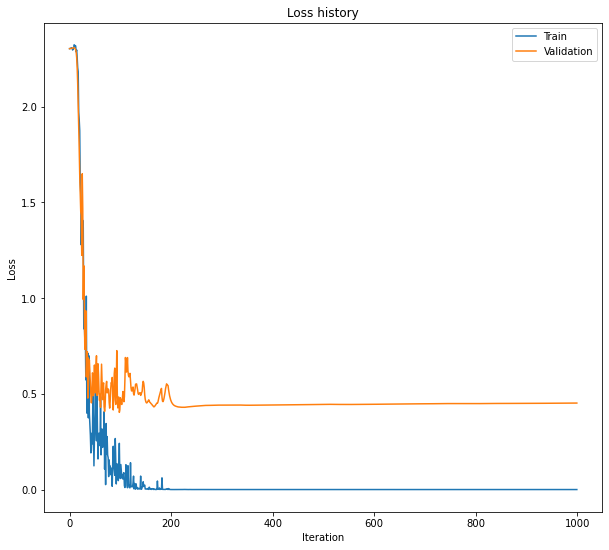

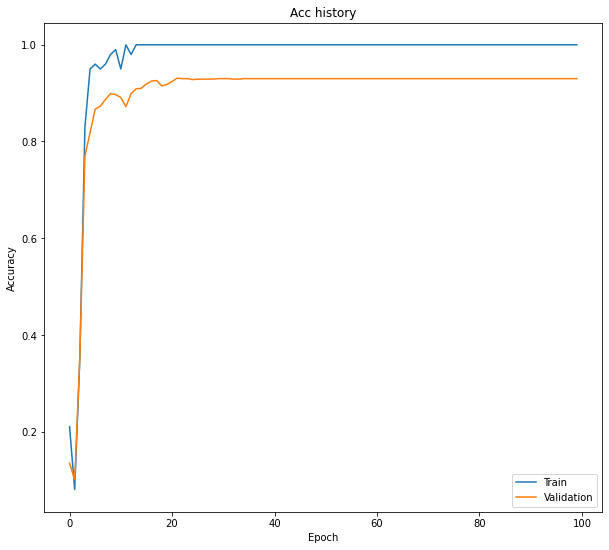

Final accuracy on test set: 0.9351111111111111


In [9]:
np.random.seed(2018011153)

print(best_hyparams)
net = Network(hidden_size = best_hyparams['hidden_size'])
stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=best_hyparams['learning_rate'], momentum=0.9, wd_decay=best_hyparams['wd_decay'], 
            num_iters=1000, batch_size=100,
            do_early_stopping=best_hyparams['early_stop'],alpha = best_hyparams['learning_rate_decay'],
            print_every=50, verbose=True)

test_utils.plot_loss_history(stats['loss_history'],stats['val_loss_history'])
test_utils.plot_acc_history(stats['acc_history'],stats['val_acc_history'])
print('Final accuracy on test set:', net.get_acc(X_test, y_test))

+ 可以看到，在设置的超参数空间中，不使用正则化方法时，虽然出现过拟合，但是在测试集上的表现相对略好于其他超参数。